<a href="https://colab.research.google.com/github/nguyeminhfit/svm_mnist_digit_classification/blob/master/FaceVerification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn
!pip install git+https://github.com/rcmalli/keras-vggface.git

     |████████████████████████████████| 2.3MB 4.6MB/s 
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-9m6xjg0y
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-9m6xjg0y
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=b724001fd92569ba6b6a3bdb69d91df9e8dad471ff24920d6e2e2d43df93543a
  Stored in directory: /tmp/pip-ephem-wheel-cache-c9mvpzd9/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [ ]:
%tensorflow_version 1.x
# example of face detection with mtcnn
import cv2
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

# create the detector, using default weights
detector = MTCNN()

def face_extract(filename, required_size=(224, 224)):
  # load image from file
  pixels = pyplot.imread(filename)  
  
  # detect faces in the image
  results = detector.detect_faces(pixels)
  # extract the bounding box from the first face
  faces = []
  for item in results:
    x1, y1, width, height = item['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    face = cv2.resize(face, required_size )
    faces.append(face)
  return faces


TensorFlow 1.x selected.


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



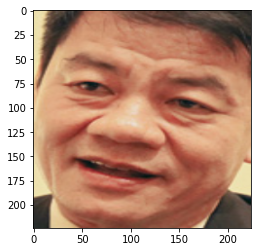

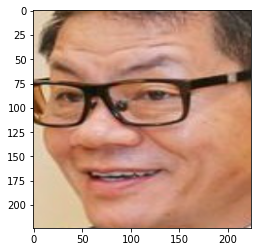

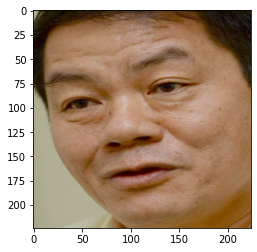

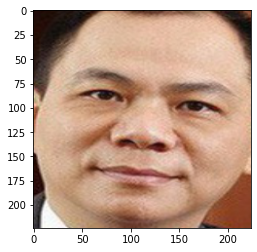

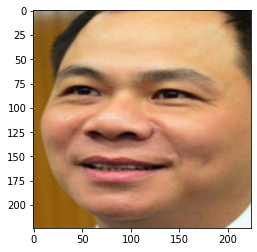

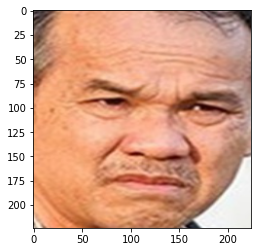

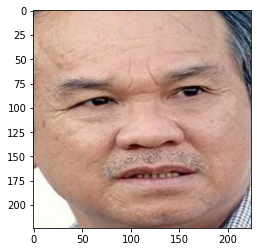

In [ ]:
# load the photo and extract the face
duong1 = face_extract('/content/Duong1.jpg')[0]
duong2 = face_extract('/content/Duong2.jpg')[0]
duong3 = face_extract('/content/Duong3.jpg')[0]
vuong1 = face_extract('/content/Vuong1.jpg')[0]
vuong2 = face_extract('/content/Vuong2.jpg')[0]
duc1   = face_extract('/content/Duc1.jpg')[0]
duc2   = face_extract('/content/Duc2.jpg')[0]
faces = [duong1,duong2,duong3,vuong1,vuong2,duc1,duc2]
for face in faces:

  # plot the extracted face
  pyplot.imshow(face)
  # show the plot
  pyplot.show()




In [ ]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# create a vggface2 model
model = VGGFace(model='senet50',include_top=False, input_shape=(224, 224, 3), pooling='max')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)


104947712/104944616 [==============================] - 3s 0us/step
Inputs: [<tf.Tensor 'input_4:0' shape=(?, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'global_average_pooling2d_17/Mean:0' shape=(?, 2048) dtype=float32>]


In [ ]:
import numpy as np
faces = np.array(faces,dtype="float64")
faces = preprocess_input(faces,version=2)
# perform prediction
yhat = model.predict(faces)
# convert prediction into names
print (yhat.shape)
[duong1,duong2,duong3,vuong1,vuong2,duc1,duc2] = yhat

(7, 2048)


In [ ]:
from scipy.spatial.distance import cosine,euclidean
def is_match(known_embedding, candidate_embedding, thresh=0.2):
	# calculate distance between embeddings
	score = cosine(known_embedding, candidate_embedding)
	if score <= thresh:
		print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
	else:
		print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))
  
def is_match_euclidean(known_embedding, candidate_embedding, thresh=110):
	# calculate distance between embeddings
	score = euclidean(known_embedding, candidate_embedding)
	if score <= thresh:
		print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
	else:
		print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))
    


In [ ]:
is_match(duong1,vuong1)
is_match(duong1,duc1)
is_match(vuong1,duc1)

>face is NOT a Match (0.295 > 0.200)
>face is NOT a Match (0.449 > 0.200)
>face is NOT a Match (0.515 > 0.200)


In [ ]:
is_match(duong1,duong3)
is_match(duc1,duc2)
is_match(vuong1,vuong2)

>face is a Match (0.123 <= 0.200)
>face is a Match (0.077 <= 0.200)
>face is a Match (0.105 <= 0.200)


In [ ]:
is_match_euclidean(duong1,duong3)
is_match_euclidean(duc1,duc2)
is_match_euclidean(vuong1,vuong2)

>face is a Match (80.546 <= 110.000)
>face is a Match (58.598 <= 110.000)
>face is a Match (75.191 <= 110.000)


In [ ]:
is_match_euclidean(duong1,vuong1)
is_match_euclidean(duong1,duc1)
is_match_euclidean(vuong1,duc1)

>face is NOT a Match (126.250 > 110.000)
>face is NOT a Match (146.801 > 110.000)
>face is NOT a Match (161.294 > 110.000)


In [ ]:
is_match(duong1,duong2)

>face is NOT a Match (0.224 > 0.200)
